In [62]:
# ensure latest module is used
from importlib import reload
import project_functions
reload(project_functions)

# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from project_functions import huber_loss, huber_loss_coordinates, get_first_lap, plot_traj_reward, plot_misalignment, interpolate_trajectories, print_huber_losses

# PD Control Training Data

In [63]:
foldername = "test_data"

# get pd data
filepath_pd = os.path.join(foldername, 'test_pd_data.csv')
df_pd = pd.read_csv(filepath_pd)

x_pd = df_pd['cur_pos_x'].values
y_pd = df_pd['cur_pos_z'].values
ytrue = df_pd['steering_angle']

x_pd_first_lap, y_pd_first_lap = get_first_lap(x_pd, y_pd, 0.7, 0.005)

# get ground truth data
filepath_gt = os.path.join(foldername, 'gt_udem1.csv')
df_gt = pd.read_csv(filepath_gt)

x_gt = df_gt['bez_x'].values
y_gt = df_gt['bez_z'].values

x_gt_first_lap, y_gt_first_lap = get_first_lap(x_gt, y_gt, 0.03, 0.03)

## Raw Data - Unweighted

Model Test Huber Loss: 0.10230555438079605
PD and Model Huber Loss: 0.04218866894798993
Ground Truth and Model Huber Loss: 0.031254925610566676


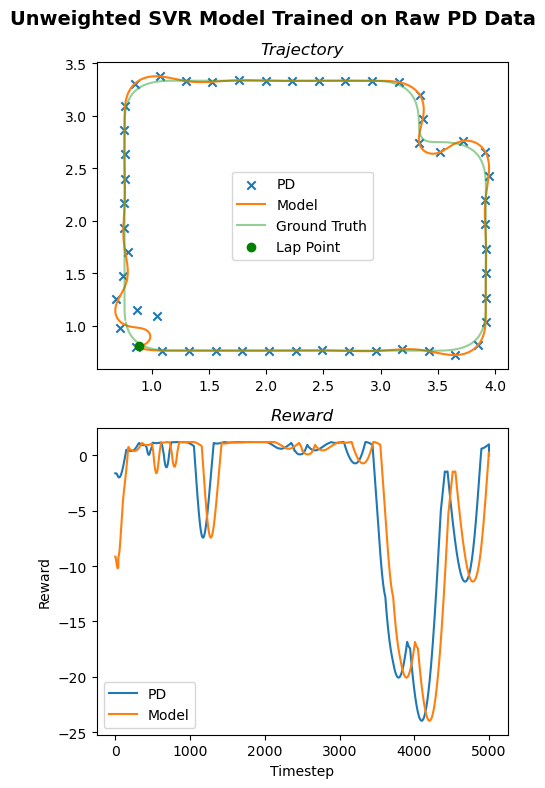

c:\Users\sophi\gym-duckietown\project\project_functions.py:156: RuntimeWarning: invalid value encountered in true_divide


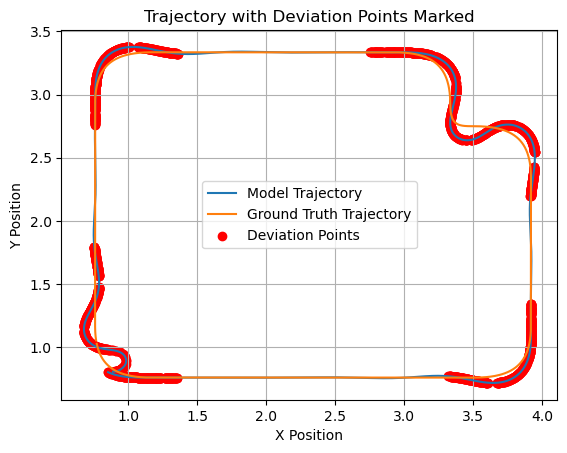

Time Spent Misaligned: 2269


In [64]:
model_name = "unweighted_svr_model_raw_pd"

# get base model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))
ypred = df_model['steering_angle'].values
x_model_first_lap, y_model_first_lap = get_first_lap(x_model, y_model, 0.7, 0.005)

# evaluate model on test data
x_gt_interp, y_gt_interp, x_pd_interp, y_pd_interp = interpolate_trajectories(x_gt_first_lap, y_gt_first_lap, x_pd_first_lap, y_pd_first_lap, x_model_first_lap, y_model_first_lap)

# ensure ypred and ytrue lengths match
ytrue = ytrue[:len(ypred)]
ypred = ypred[:len(ytrue)]

print_huber_losses(ytrue, ypred, x_pd_interp, y_pd_interp, x_gt_interp, y_gt_interp, x_model_first_lap, y_model_first_lap)

plot_traj_reward(x_pd, y_pd, x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, df_model, df_pd, "Unweighted SVR Model Trained on Raw PD Data")
plot_misalignment(x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, max_angle_deviation=5)

## Raw Data - Weighted

Model Test Huber Loss: 0.04494061799599221
PD and Model Huber Loss: 0.0029425921678399715
Ground Truth and Model Huber Loss: 0.004508974046404208


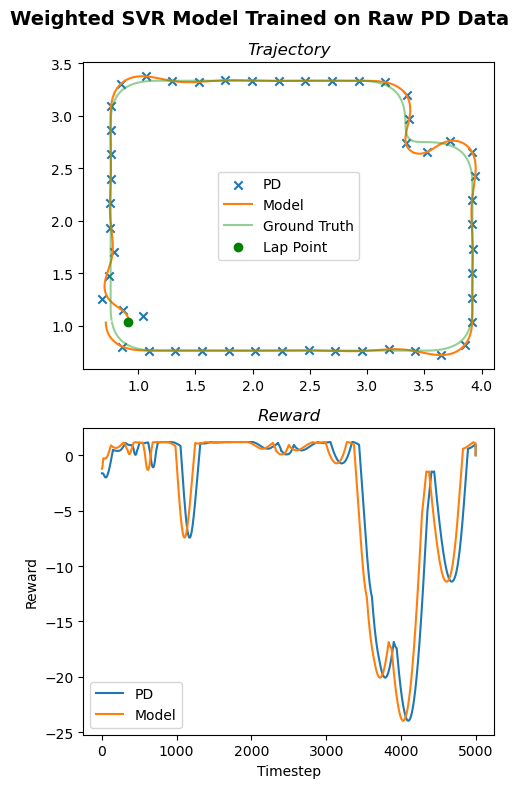

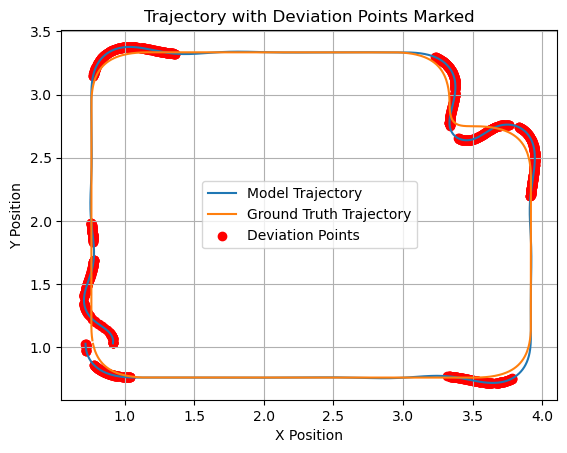

Time Spent Misaligned: 1540


In [75]:
model_name = "weighted_svr_model_raw_pd"

# get base model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))
ypred = df_model['steering_angle'].values
x_model_first_lap, y_model_first_lap = get_first_lap(x_model, y_model, 0.7, 0.005)
# evaluate model on test data
x_gt_interp, y_gt_interp, x_pd_interp, y_pd_interp = interpolate_trajectories(x_gt_first_lap, y_gt_first_lap, x_pd_first_lap, y_pd_first_lap, x_model_first_lap, y_model_first_lap)

# ensure ypred and ytrue lengths match
ytrue = ytrue[:len(ypred)]
ypred = ypred[:len(ytrue)]

print_huber_losses(ytrue, ypred, x_pd_interp, y_pd_interp, x_gt_interp, y_gt_interp, x_model_first_lap, y_model_first_lap)
plot_traj_reward(x_pd, y_pd, x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, df_model, df_pd, "Weighted SVR Model Trained on Raw PD Data")
plot_misalignment(x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, max_angle_deviation=5)


## Processed Data - Unweighted

Model Test Huber Loss: 0.1055967342896053
PD and Model Huber Loss: 1.6418986288940969
Ground Truth and Model Huber Loss: 1.6435945347615277


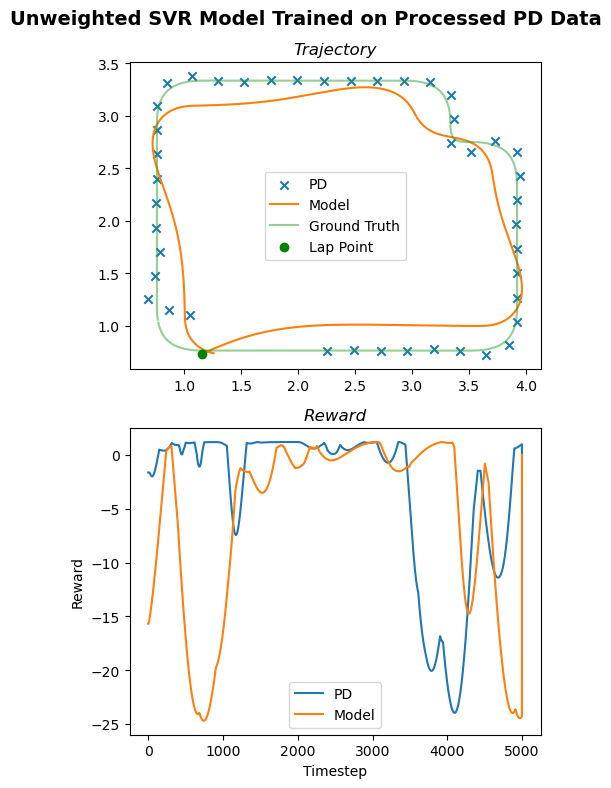

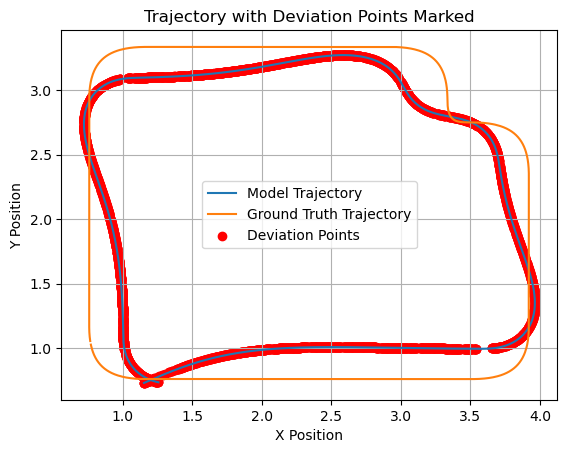

Time Spent Misaligned: 3890


In [72]:
model_name = "unweighted_svr_model_processed_pd"

# get base model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))
ypred = df_model['steering_angle'].values
x_model_first_lap, y_model_first_lap = get_first_lap(x_model, y_model, 0.7, 0.005)
# evaluate model on test data
x_gt_interp, y_gt_interp, x_pd_interp, y_pd_interp = interpolate_trajectories(x_gt_first_lap, y_gt_first_lap, x_pd_first_lap, y_pd_first_lap, x_model_first_lap, y_model_first_lap)

# ensure ypred and ytrue lengths match
ytrue = ytrue[:len(ypred)]
ypred = ypred[:len(ytrue)]

print_huber_losses(ytrue, ypred, x_pd_interp, y_pd_interp, x_gt_interp, y_gt_interp, x_model_first_lap, y_model_first_lap)
plot_traj_reward(x_pd, y_pd, x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, df_model, df_pd, "Unweighted SVR Model Trained on Processed PD Data")
plot_misalignment(x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, max_angle_deviation=5)

## Processed Data - Weighted

Model Test Huber Loss: 0.09992907828422254
PD and Model Huber Loss: 1.6266138723449393
Ground Truth and Model Huber Loss: 1.6276092591356863


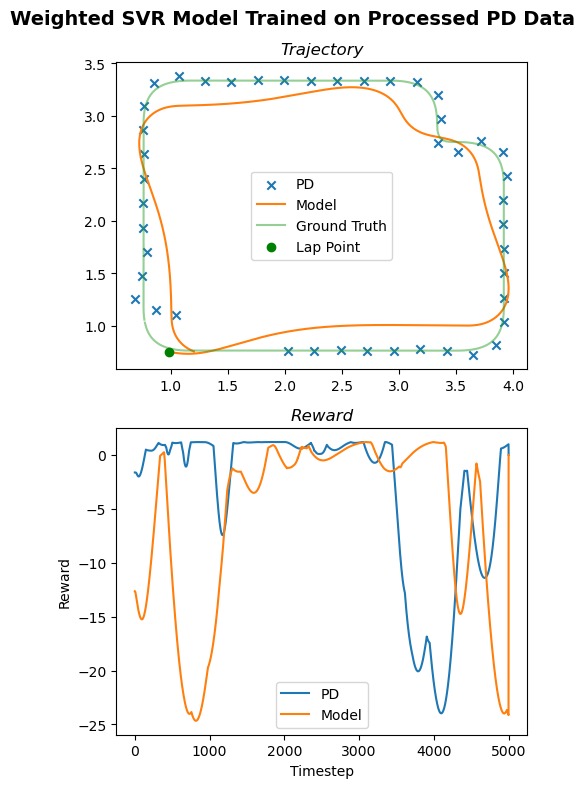

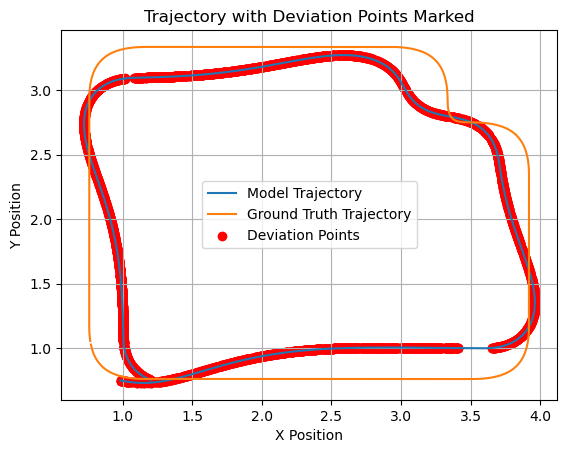

Time Spent Misaligned: 3867


In [73]:
model_name = "weighted_svr_model_processed_pd"

# get base model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))
ypred = df_model['steering_angle'].values
x_model_first_lap, y_model_first_lap = get_first_lap(x_model, y_model, 0.7, 0.005)
# evaluate model on test data
x_gt_interp, y_gt_interp, x_pd_interp, y_pd_interp = interpolate_trajectories(x_gt_first_lap, y_gt_first_lap, x_pd_first_lap, y_pd_first_lap, x_model_first_lap, y_model_first_lap)

# ensure ypred and ytrue lengths match
ytrue = ytrue[:len(ypred)]
ypred = ypred[:len(ytrue)]

print_huber_losses(ytrue, ypred, x_pd_interp, y_pd_interp, x_gt_interp, y_gt_interp, x_model_first_lap, y_model_first_lap)
plot_traj_reward(x_pd, y_pd, x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, df_model, df_pd, "Weighted SVR Model Trained on Processed PD Data")
plot_misalignment(x_model_first_lap, y_model_first_lap, x_gt_first_lap, y_gt_first_lap, max_angle_deviation=5)